Chapter 13

# 二元一次函数
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码通过生成一个二维正方形网格，展示了四种简单函数在该网格上的曲面图和等高线图。具体函数形式包括 $$f(x_1, x_2) = -x_1$$、$$f(x_1, x_2) = x_2$$、$$f(x_1, x_2) = x_1 + x_2$$ 和 $$f(x_1, x_2) = -x_1 + x_2$$。每个函数都使用了`plot_surf`和`plot_contourf`函数来展示其曲面和等高线。

代码首先定义 `mesh_square` 函数生成中心为 $ (x_1, x_2) = (0,0) $、半径为 $r=2$ 的正方形网格，网格点数为 30。然后，通过`plot_surf`函数为每个函数绘制三维曲面，曲面颜色根据函数值的大小用`coolwarm`配色方案表示。之后，代码使用`plot_contourf`函数绘制相应的等高线填充图，在二维平面上展示函数的高度变化。

这两种可视化方式帮助直观理解每个函数的特征。例如：
- 对于 $$f(x_1, x_2) = -x_1$$，函数值仅依赖于 $x_1$，因而曲面在 $x_1$ 方向变化而在 $x_2$ 方向保持不变。
- 对于 $$f(x_1, x_2) = x_2$$，曲面在 $x_2$ 方向变化，在 $x_1$ 方向恒定。
- 对于 $$f(x_1, x_2) = x_1 + x_2$$，曲面在 $x_1$ 和 $x_2$ 方向均变化，且两者等权。
- 对于 $$f(x_1, x_2) = -x_1 + x_2$$，曲面随 $x_1$ 和 $x_2$ 同时变化，但两个方向影响相反。

这段代码的展示方式让观察者在不同坐标轴影响下更直观地理解函数的变化趋势和形态。

## 导入包

In [1]:
import math  # 导入math库，用于数学运算
import numpy as np  # 导入numpy库，用于数值计算
import matplotlib.pyplot as plt  # 导入matplotlib库，用于绘图
from matplotlib import cm  # 导入matplotlib的cm模块，用于配色

## 定义mesh_square函数，生成正方形网格

In [2]:
def mesh_square(x1_0, x2_0, r, num):  # 生成网格，设置网格中心及半径和网格点数量
    
    rr = np.linspace(-r, r, num)  # 生成范围为[-r, r]的网格点
    xx1, xx2 = np.meshgrid(rr, rr);  # 创建x1和x2的网格
    
    xx1 = xx1 + x1_0;  # 平移网格中心到x1_0
    xx2 = xx2 + x2_0;  # 平移网格中心到x2_0
    
    return xx1, xx2  # 返回x1和x2的网格

## 定义plot_surf函数，用于绘制三维曲面图

In [3]:
def plot_surf(xx1, xx2, ff, caption):  # 绘制三维曲面
    
    norm_plt = plt.Normalize(ff.min(), ff.max())  # 标准化颜色范围
    colors = cm.coolwarm(norm_plt(ff))  # 为曲面配色

    fig = plt.figure()  # 创建图形
    ax = fig.add_subplot(projection='3d')  # 创建三维坐标轴
    surf = ax.plot_surface(xx1, xx2, ff, facecolors=colors, shade=False)  # 绘制曲面
    surf.set_facecolor((0, 0, 0, 0))  # 设置透明背景
    
    plt.tight_layout()  # 自动调整布局
    ax.set_xlabel(r'$\it{x_1}$')  # 设置x轴标签
    ax.set_ylabel(r'$\it{x_2}$')  # 设置y轴标签
    ax.set_zlabel(r'$\it{f}$($\it{x_1}$,$\it{x_2}$)')  # 设置z轴标签
    ax.set_title(caption)  # 设置标题
    ax.set_proj_type('ortho')
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # x轴网格
    ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # y轴网格
    ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # z轴网格

    plt.rcParams["font.family"] = "Times New Roman"  # 设置字体
    plt.rcParams["font.size"] = "10"  # 设置字体大小

## 定义plot_contourf函数，用于绘制等高线填充图

In [4]:
def plot_contourf(xx1, xx2, ff, caption):  # 绘制等高线填充图
    
    fig, ax = plt.subplots()  # 创建图形和坐标轴
    cntr2 = ax.contourf(xx1, xx2, ff, levels=15, cmap="RdBu_r")  # 绘制填充等高线图

    fig.colorbar(cntr2, ax=ax)  # 添加颜色条
    ax.set_xlabel(r'$\it{x_1}$')  # 设置x轴标签
    ax.set_ylabel(r'$\it{x_2}$')  # 设置y轴标签
    ax.set_title(caption)  # 设置标题
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格线

## 初始化网格

In [5]:
x1_0 = 0  # 网格中心的x1坐标
x2_0 = 0  # 网格中心的x2坐标
r = 2  # 网格半径
num = 30  # 网格点数量
xx1, xx2 = mesh_square(x1_0, x2_0, r, num)  # 生成正方形网格

## 绘制不同的函数和网格

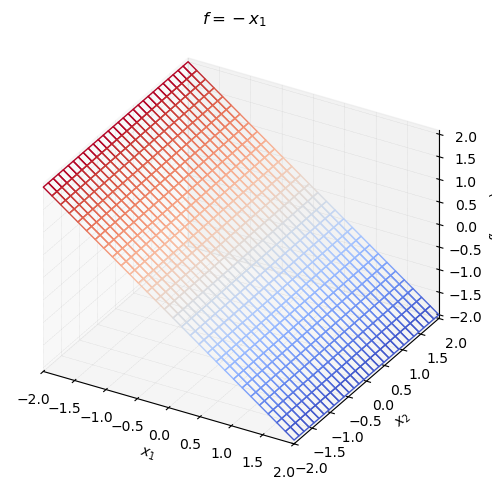

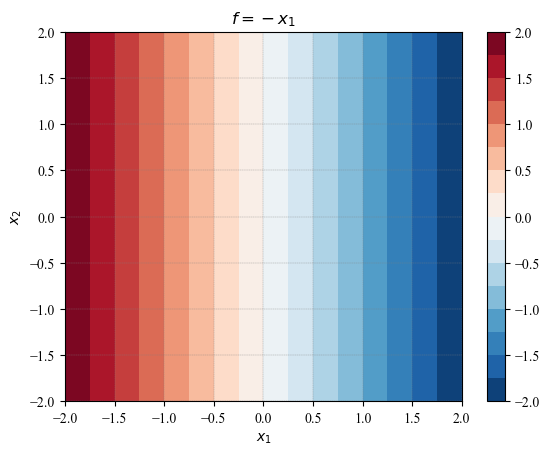

In [6]:
# f(x1,x2) = -x1
ff = -xx1;  # 定义函数
caption = r'$\it{f} = -\it{x_1}$';  # 设置标题

plot_surf(xx1, xx2, ff, caption)  # 绘制曲面图
plot_contourf(xx1, xx2, ff, caption)  # 绘制等高线图

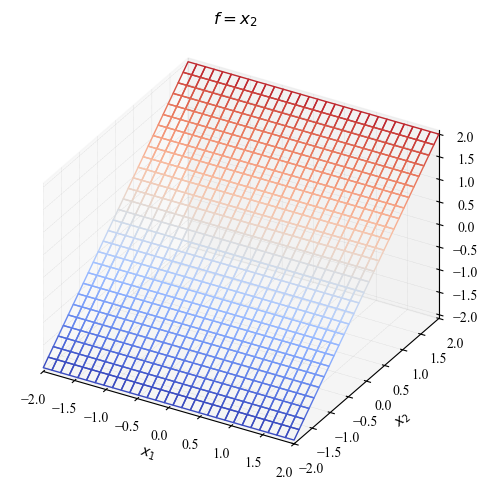

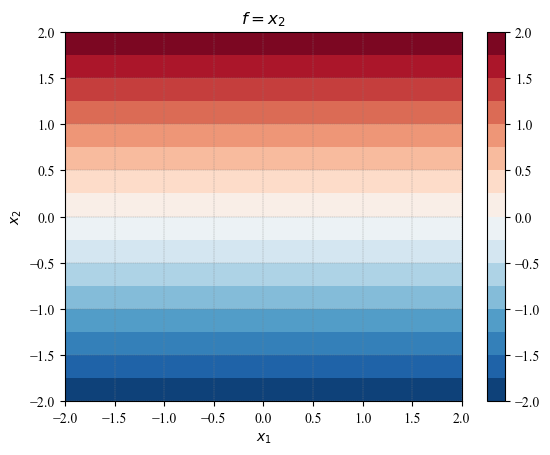

In [7]:
# f(x1,x2) = x2
ff = xx2;  # 定义函数
caption = r'$\it{f} = \it{x_2}$';  # 设置标题

plot_surf(xx1, xx2, ff, caption)  # 绘制曲面图
plot_contourf(xx1, xx2, ff, caption)  # 绘制等高线图

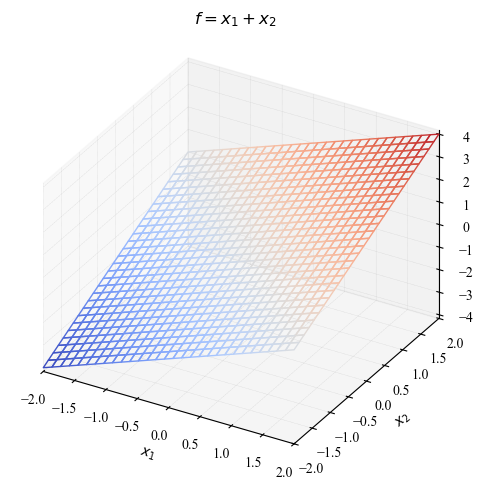

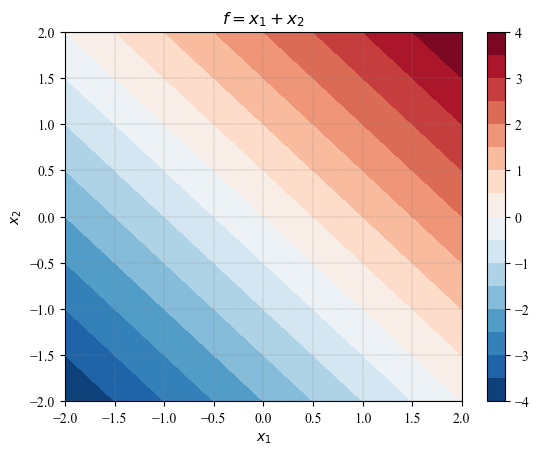

In [8]:
# f(x1,x2) = x1 + x2
ff = xx1 + xx2;  # 定义函数
caption = r'$\it{f} = \it{x_1} + \it{x_2}$';  # 设置标题

plot_surf(xx1, xx2, ff, caption)  # 绘制曲面图
plot_contourf(xx1, xx2, ff, caption)  # 绘制等高线图

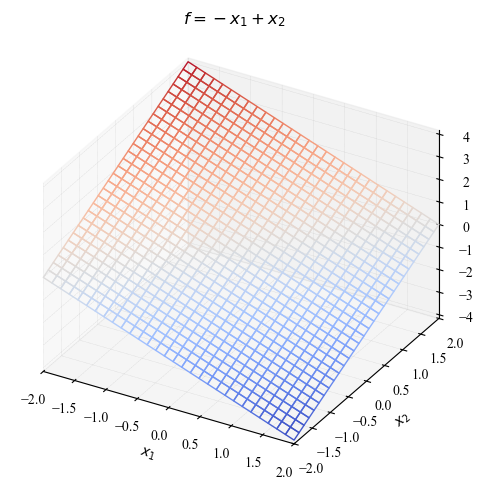

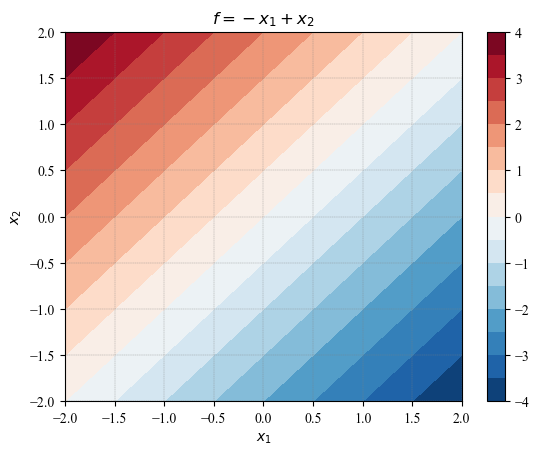

In [9]:
# f(x1,x2) = -x1 + x2
ff = -xx1 + xx2;  # 定义函数
caption = r'$\it{f} = -\it{x_1} + \it{x_2}$';  # 设置标题

plot_surf(xx1, xx2, ff, caption)  # 绘制曲面图
plot_contourf(xx1, xx2, ff, caption)  # 绘制等高线图